In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import joblib


In [ ]:
artifacts_dir = Path("homeworks/HW06/artifacts")
figures_dir = artifacts_dir / "figures"
artifacts_dir.mkdir(parents=True, exist_ok=True)
figures_dir.mkdir(parents=True, exist_ok=True)
RANDOM_STATE = 42

In [168]:
df = pd.read_csv("S06-hw-dataset-02.csv")
df.head()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
0,1,-0.149235,-2.826966,-0.522901,-4.198449,1.364943,0.815043,-1.195518,-1.932232,2.396353,...,-0.159323,0.448015,0.572745,0.149916,0.878392,-0.679733,1.412751,0.421883,9.217167,1
1,2,-1.966180,-4.877542,0.268367,-9.607791,0.097149,1.347185,-3.872575,-0.395117,1.710068,...,-0.389212,1.383794,0.169876,0.043969,-0.963545,1.006643,-2.488690,9.590124,24.772826,0
2,3,-0.555964,-0.999920,0.209673,-14.119498,-1.808950,-0.006222,-4.651108,0.911944,-0.289037,...,-1.383970,3.044321,-0.182864,1.425649,-8.418598,-4.629754,-0.439798,0.555919,41.800517,0
3,4,-2.049199,-5.600713,-1.664677,-6.263893,-5.224455,0.848351,1.407210,-0.542080,0.119102,...,-2.713080,2.762637,-0.520796,-0.142455,1.668338,2.292810,-10.744916,11.476977,65.315860,0
4,5,-0.220556,4.889479,-2.235840,6.450046,0.774389,-2.382625,2.584816,4.211856,-0.317889,...,-1.302872,2.478862,1.528610,1.098131,3.547087,2.517757,-9.364106,-1.078404,93.017870,0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       18000 non-null  int64  
 1   f01      18000 non-null  float64
 2   f02      18000 non-null  float64
 3   f03      18000 non-null  float64
 4   f04      18000 non-null  float64
 5   f05      18000 non-null  float64
 6   f06      18000 non-null  float64
 7   f07      18000 non-null  float64
 8   f08      18000 non-null  float64
 9   f09      18000 non-null  float64
 10  f10      18000 non-null  float64
 11  f11      18000 non-null  float64
 12  f12      18000 non-null  float64
 13  f13      18000 non-null  float64
 14  f14      18000 non-null  float64
 15  f15      18000 non-null  float64
 16  f16      18000 non-null  float64
 17  f17      18000 non-null  float64
 18  f18      18000 non-null  float64
 19  f19      18000 non-null  float64
 20  f20      18000 non-null  float64
 21  f21      180

In [170]:
df.describe()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,18000.000000
mean,9000.500000,-0.418555,0.614251,0.004559,0.059000,0.405086,0.012123,-0.283473,-0.266880,0.255107,...,-0.139825,0.108568,0.007238,0.000904,-0.716862,-0.274520,0.344991,1.517339,2.576221e+01,0.262611
std,5196.296758,2.178005,3.926778,1.000134,5.713672,2.497581,0.987226,2.193891,2.081431,2.225776,...,2.148834,2.234315,0.997861,1.002115,3.913704,2.482890,4.927315,10.630850,5.423748e+01,0.440065
min,1.000000,-10.014698,-15.510323,-4.031762,-23.663256,-12.289308,-3.741536,-9.591425,-8.293319,-13.655742,...,-8.171469,-9.214171,-3.937091,-3.963063,-19.389908,-10.031559,-20.768452,-107.788145,1.895059e-07,0.000000
25%,4500.750000,-1.866134,-2.048192,-0.673127,-3.544964,-1.153000,-0.653090,-1.743214,-1.688121,-1.177480,...,-1.589638,-1.369266,-0.663023,-0.684164,-3.286842,-1.897893,-2.752685,-2.018750,1.226029e+00,0.000000
50%,9000.500000,-0.465100,0.600291,0.003581,0.072826,0.485625,0.018765,-0.251263,-0.302463,0.350739,...,-0.204785,0.158715,0.001912,-0.003157,-0.618472,-0.339901,0.573153,0.318011,6.581865e+00,0.000000
75%,13500.250000,0.966393,3.229850,0.671390,3.689490,2.075739,0.689304,1.195481,1.109589,1.764113,...,1.254595,1.600671,0.677296,0.676558,1.948803,1.314163,3.649794,4.212111,2.576847e+01,1.000000
max,18000.000000,9.589975,15.417329,3.817025,26.815691,10.665184,3.528280,7.794627,8.892834,8.699629,...,9.290667,8.794320,4.341030,3.781380,14.065595,10.639974,20.226291,94.891804,1.103449e+03,1.000000


In [171]:
df['target'].value_counts(normalize=True)

target
0    0.737389
1    0.262611
Name: proportion, dtype: float64

In [172]:
print(df.isnull().sum().sum(), "пропущенных значений")

0 пропущенных значений


In [173]:
print(df.dtypes.unique())
print(df.dtypes)

[dtype('int64') dtype('float64')]
id           int64
f01        float64
f02        float64
f03        float64
f04        float64
f05        float64
f06        float64
f07        float64
f08        float64
f09        float64
f10        float64
f11        float64
f12        float64
f13        float64
f14        float64
f15        float64
f16        float64
f17        float64
f18        float64
f19        float64
f20        float64
f21        float64
f22        float64
f23        float64
f24        float64
f25        float64
f26        float64
f27        float64
f28        float64
f29        float64
f30        float64
f31        float64
f32        float64
f33        float64
f34        float64
f35        float64
x_int_1    float64
x_int_2    float64
target       int64
dtype: object


In [ ]:
X = df.drop(columns=["id", "target"])
print(X.columns)

y = df['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

Index(['f01', 'f02', 'f03', 'f04', 'f05', 'f06', 'f07', 'f08', 'f09', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30',
       'f31', 'f32', 'f33', 'f34', 'f35', 'x_int_1', 'x_int_2'],
      dtype='object')


Фиксированный seed нужен для воспроизводимости (чтобы было одинаковое распределение, а не случайное). stratify=y сохраняет распределение классов в train/test

In [ ]:
best_models = {}
metrics = {}
search_summaries = {}

dummy_model = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE) 
# DummyClassifier - простейшая модель, которая не обучается, а просто дает ответы на основе заданных правил
# most_frequent - всегда предсказывает наиболее часто встречающийся класс
dummy_model.fit(x_train, y_train)
best_models["dummy"] = dummy_model


In [ ]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))
])
print(pipe.get_params().keys())
log_grid_search = GridSearchCV(
    pipe,
    scoring="roc_auc",
    n_jobs=-1,
    param_grid={"logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]} # подбор коэффициента силы регуляризации применяется только для модели лог. регрессии
)
log_grid_search.fit(x_train, y_train)

print(f"Лучшие параметры: {log_grid_search.best_params_}")
print(f"Лучший ROC-AUC на CV: {log_grid_search.best_score_:.4f}")

best_model = log_grid_search.best_estimator_
best_models["log_reg"] = best_model
search_summaries['log_reg'] = {
    'best_params': log_grid_search.best_params_,
    'best_score': log_grid_search.best_score_
}

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'logreg', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'logreg__C', 'logreg__class_weight', 'logreg__dual', 'logreg__fit_intercept', 'logreg__intercept_scaling', 'logreg__l1_ratio', 'logreg__max_iter', 'logreg__multi_class', 'logreg__n_jobs', 'logreg__penalty', 'logreg__random_state', 'logreg__solver', 'logreg__tol', 'logreg__verbose', 'logreg__warm_start'])
Лучшие параметры: {'logreg__C': 100.0}
Лучший ROC-AUC на CV: 0.8041


DecisionTreeClassifier. Обязательно показать контроль сложности (например, max_depth + min_samples_leaf; или ccp_alpha).

In [ ]:
dec_tree_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 2, 5, 10]
}
dec_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
grid_search_tree = GridSearchCV(dec_tree, dec_tree_params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_tree.fit(x_train, y_train)

best_model = grid_search_tree.best_estimator_
best_models['DecisionTree'] = best_model
search_summaries['DecisionTree'] = {
    'best_params': grid_search_tree.best_params_,
    'best_score': grid_search_tree.best_score_
}

RandomForestClassifier. Желательно посмотреть хотя бы одну из "лесных" ручек (max_features, min_samples_leaf, max_depth).

In [ ]:
rand_forest_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}
rand_forest = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)
rand_forest_cv = GridSearchCV(rand_forest, rand_forest_params, cv=5, scoring='roc_auc', n_jobs=-1)
rand_forest_cv.fit(x_train, y_train)

best_model = rand_forest_cv.best_estimator_
best_models['RandomForest'] = best_model
search_summaries['RandomForest'] = {
    'best_params': rand_forest_cv.best_params_,
    'best_score': rand_forest_cv.best_score_
}

C:\Users\vlada\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Один boosting на выбор: AdaBoostClassifier или GradientBoostingClassifier или HistGradientBoostingClassifier


In [ ]:
grad_boost_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}
grad_boost = GradientBoostingClassifier(random_state=RANDOM_STATE)
grad_boost_cv = GridSearchCV(grad_boost, grad_boost_params, cv=5, scoring='roc_auc', n_jobs=-1)
grad_boost_cv.fit(x_train, y_train)

best_models['GradientBoosting'] = grad_boost_cv.best_estimator_
search_summaries['GradientBoosting'] = {
    'best_params': grad_boost_cv.best_params_,
    'best_score': grad_boost_cv.best_score_
}

StackingClassifier (2-3 базовых модели + метамодель). Важно: делать стекинг корректно (через CV-логику; StackingClassifier в sklearn это делает).

In [ ]:
estimators = [
    ('dt', best_models['DecisionTree']),
    ('rf', best_models['RandomForest'])
]
stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=RANDOM_STATE),
    cv=5,
    n_jobs=-1
)
stacking.fit(x_train, y_train)
best_models['Stacking'] = stacking

Оценка метрик всех моделей

In [181]:
for name, model in best_models.items():
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    metrics[name] = {'accuracy': accuracy, 'f1': f1, 'roc_auc': roc_auc}

    print(f"{name} результаты:")
    print(f"Accuracy: {accuracy:.4f}") # точность (доля правильных ответов)
    print(f"f1-score: {f1:.4f}") # f1-мера
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("-" * 10) 
    

dummy результаты:
Accuracy: 0.7375
f1-score: 0.0000
ROC-AUC: 0.5000
----------
log_reg результаты:
Accuracy: 0.8119
f1-score: 0.5607
ROC-AUC: 0.7977
----------
DecisionTree результаты:
Accuracy: 0.8383
f1-score: 0.6576
ROC-AUC: 0.8371
----------
RandomForest результаты:
Accuracy: 0.8908
f1-score: 0.7579
ROC-AUC: 0.9281
----------
GradientBoosting результаты:
Accuracy: 0.9039
f1-score: 0.8009
ROC-AUC: 0.9253
----------
Stacking результаты:
Accuracy: 0.9047
f1-score: 0.8070
ROC-AUC: 0.9281
----------


Худший результат показывает dummy: так как чаще встречается класс 0 (73 процента) - а модель использует параметр most_frequent, в итоге получается ни одного положительно предсказанного класса и f1 равно 0. Логистическая регрессия уже выявляет позитивные примеры, но с умеренным качеством. DecisionTree улучшает все метрики за счет нелинейных разбиений, но уступает ансамблям. RandomForest демонстрирует высокое качество и хорошее обнаружение положительных примеров благодаря усреднению множества деревьев. GradientBoosting достигает наилучшего F1. Stacking слегка улучшает F1 и сохраняет высокий AUC, объединяя сильные стороны базовых моделей без переобучения 



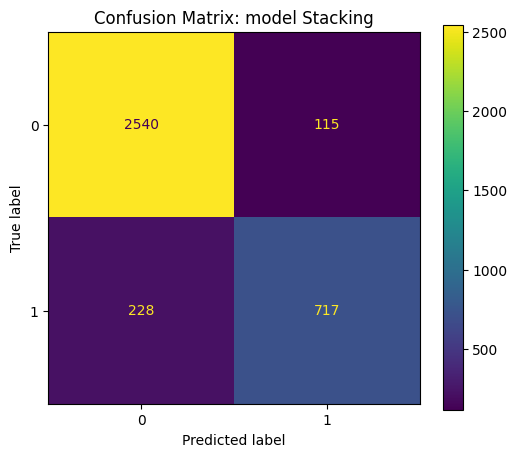

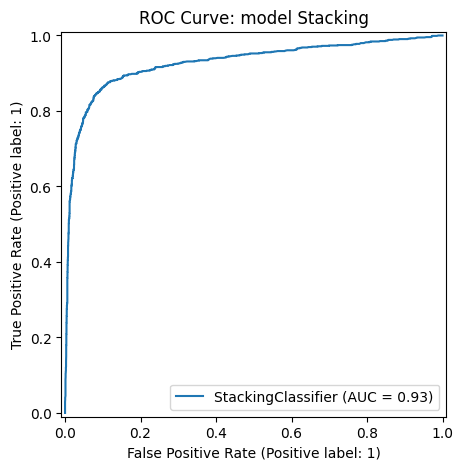

In [ ]:
best_model_name = max(metrics.keys(), key=lambda k: metrics[k]['roc_auc'])
best_model = best_models[best_model_name]

fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test, ax=ax)
plt.title(f'Confusion Matrix: model {best_model_name}')
plt.savefig(f'artifacts/figures/confusion_matrix.png', bbox_inches='tight')

fig, ax = plt.subplots(figsize=(6, 5))
RocCurveDisplay.from_estimator(best_model, x_test, y_test, ax=ax)
plt.title(f'ROC Curve: model {best_model_name}')
plt.savefig('artifacts/figures/roc_curve.png', bbox_inches='tight')

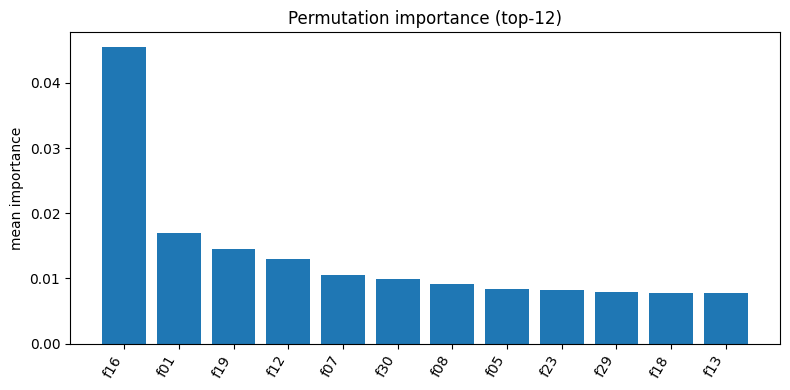

In [185]:
# Permutation importance: по очереди перемешиваем один признак и смотрим, насколько падает качество.
# Чем сильнее падение – тем более “важен” признак для данной модели и данного набора данных.
perm = permutation_importance(
    best_model, x_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring="roc_auc"
)

importances = perm.importances_mean
feature_cols = [col for col in df.columns if col not in ["id", "target"]]
idx = np.argsort(importances)[::-1][:12]

plt.figure(figsize=(8, 4))
plt.bar(range(len(idx)), importances[idx])
plt.xticks(range(len(idx)), [feature_cols[i] for i in idx], rotation=60, ha="right")
plt.ylabel("mean importance")
plt.title("Permutation importance (top-12)")
plt.tight_layout()
plt.savefig('artifacts/figures/permutation_importance.png', bbox_inches='tight')
plt.show()

Самый важный признак - f16 (влияние около 0.045). Далее следуют f01, f19, f12 (влияние около 0.015–0.018), они также значимы, но в 2–3 раза слабее f16. Остальные признаки (f07, f30, f08, ...) примерно одинаково важны (около 0.01), что говорит о распределенной важности, так как кроме f16 нет выделяющихся признаков

In [ ]:
with open('artifacts/metrics_test.json', 'w') as f:
    json.dump(metrics, f, indent=4)

with open('artifacts/search_summaries.json', 'w') as f:
    json.dump(search_summaries, f, indent=4, default=str)

joblib.dump(best_model, 'artifacts/best_model.joblib')

best_metrics = metrics[best_model_name]
meta = {
    'best_model': best_model_name,
    'params': best_model.get_params() if hasattr(best_model, 'get_params') else str(best_model),
    'test_metrics': best_metrics
}
with open('artifacts/best_model_meta.json', 'w') as f:
    json.dump(meta, f, indent=4, default=str)

print(f"Лучшая модель: {best_model_name}")
print(f"Метрики на test: {best_metrics}")

Лучшая модель: Stacking
Метрики на test: {'accuracy': 0.9047222222222222, 'f1': np.float64(0.806978052898143), 'roc_auc': np.float64(0.9281144690560885)}


Что будет, если поменять `random_state` (хотя бы 5 прогонов для 1-2 моделей)

In [186]:
best_dec_tree_params = search_summaries["DecisionTree"]["best_params"]
best_dec_tree_params

{'max_depth': 10, 'min_samples_leaf': 10}

In [187]:
best_rand_forest_params = search_summaries["RandomForest"]["best_params"]
best_rand_forest_params

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [189]:
seeds = [1,2,3,4,5]

results = {
    'DecisionTree': {'f1': [], 'roc_auc': []},
    'RandomForest': {'f1': [], 'roc_auc': []}
}

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )
    
    dt = DecisionTreeClassifier(**best_dec_tree_params, random_state=seed)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    y_proba_dt = dt.predict_proba(X_test)[:, 1]
    
    results['DecisionTree']['f1'].append(f1_score(y_test, y_pred_dt))
    results['DecisionTree']['roc_auc'].append(roc_auc_score(y_test, y_proba_dt))
    
    rf = RandomForestClassifier(**best_rand_forest_params, random_state=seed, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    y_proba_rf = rf.predict_proba(X_test)[:, 1]
    
    results['RandomForest']['f1'].append(f1_score(y_test, y_pred_rf))
    results['RandomForest']['roc_auc'].append(roc_auc_score(y_test, y_proba_rf))

for name in results:
    f1s = results[name]['f1']
    aucs = results[name]['roc_auc']
    print(f"{name}:")
    print(f"F1:  {np.mean(f1s):.4f} +- {np.std(f1s):.4f}")
    print(f"AUC: {np.mean(aucs):.4f} +- {np.std(aucs):.4f}")

DecisionTree:
F1:  0.6580 +- 0.0134
AUC: 0.8279 +- 0.0111
RandomForest:
F1:  0.7637 +- 0.0137
AUC: 0.9289 +- 0.0052
